In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Homework 1 - Linear Regression

Please complete these exercises in addition to those outlined in the course notes.


### Exercise 1.22 - Implement simple linear regression
The goal of this exercise is to walk you through the process of implementing linear regression yourself from scratch in Python. We have provided skeleton code for you that you should fill out. 
**Get data into a numpy array, compute $a^*$ and $b^*$ with closed form solution, compare with built in solution, plot points and line.**

Recap: we want to find $a$ and $b$ so that the loss function $Q(a,b) = \sum_{i=1}^N (y_i - ax_i - b)^2$ is minimized. You have shown earlier in this assignment that $Q(a,b)$ is minimized when 
$$a^* = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} 
\quad \text{and} \quad b^* = \bar{y} - a^* \bar{x}$$


#### (a) Compute regression parameters
Below is the skeleton of a function called `regression_parameters` which takes, as inputs, two arrays: `x` and `y`. Fill in the function with expressions that compute the values for $a^*$ and $b^*$ above. Then, test your function in the cell below, which generates some *simulated* data that fits a specific linear model. Your function is likely working well if the output is close ($\pm 0.2$) to the true values of $a=5$ and $b=2$.

In [2]:
def regression_parameters(x,y):
    '''
    Computs the optimal parameters for simple linear regression
    Inputs:
        x: a numpy array of the dependent variable
        y: a numpy array of the independent variable
    Returns:
        List of optimal regression parameters
    '''
    x_mean = x.mean()
    y_mean = y.mean()

    a_star = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
    b_star = y_mean - (a_star * x_mean)


    return [a_star, b_star]

In [3]:
# Run this cell to generate data to test your function

x = np.random.uniform(size=100) # generate x values random
noise = np.random.normal(scale=.1, size=100) # generate noise to add to the problem
a = 5 # set the slope
b = 2 # set the intercept

y = a*x + b + noise # generate y values using the model y = ax+b+noise

[a_star, b_star] = regression_parameters(x, y) # call your function!

print([a_star, b_star])

[5.02333207771645, 1.9988193741751972]


# 5/5

#### (b) Plotting your prediction


Now that we have computed estimates of the regression parameters, we can use them to make a prediction for any values of x: 
$$\hat{y} = a^*x + b^*$$
Anytime you run a regression, it's very important to plot the data with the prediction to see how well the model fits. 

The first step to doing this is to compute the *predicted* or *fitted* value of $y$. This is the result of plugging your original values for $x$ back into the best fit line you computed. In the function called `predict`, write an expression that will return the fitted values for given paramters $a,b$ and an input array $x$.

Now, compute the prediction $\hat{y}$ and make a plot that plots the original data $(x,y)$ as a *scatterplot* with the predicted data $(x, \hat{y})$ as a *line* on top of the scatterplot.

**Hint:** It might be useful to set these plots to use different colors so it's easier to distinguish the points and the line; you can do this by adding the `color=` argument to the plotting function. See [here](https://matplotlib.org/stable/gallery/color/named_colors.html) for the list of available colors.

Text(0, 0.5, 'y')

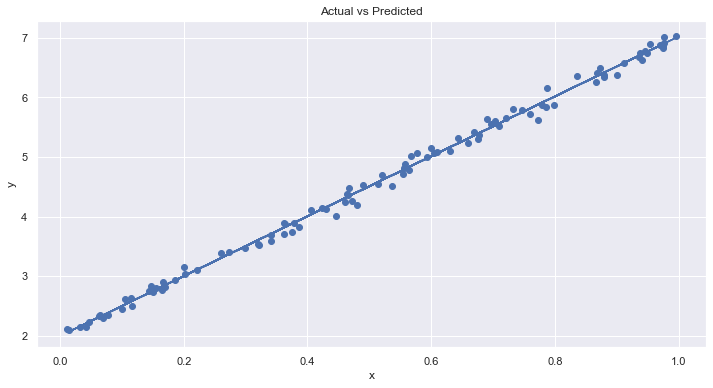

In [4]:
def predict(a,b,x):
    return a*x + b # replace this return statement with a formula for predicting the response using the estimated parameters a and b

y_hat = predict(a_star, b_star, x) # replace with expression to make a prediction

# plotting code
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')


Based on your plot, can you identify an issues with this model? Do the residuals look ok? State the two important assumptions you make when doing linear regression (look at the "Diagnostics" slides from Lecture 3) and whether or not your model is in violation of either of them.

### My answer: 
The two important assumptions when doing regression is the relationship between the response and explanatory variables should be linear, and residuals should not be correlated with explanatory variables.

My model does not have any issues. The relationship between the response and explantory variables are linear, and the residuals isn't correlated with any explanatory variables.

# 5/5

#### (c) Evaluate your model

After computing regression parameters, we are often interested in how well the model prediction matches the actual data. A popular choice for this is using the value $R^2$, also known as the *coefficient of determination*, defined as 

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{\sum_{i=1}^n(y_i - \bar{y})^2} = 1 - \frac{SS_{res}}{SS_{tot}}$$

where $SS_{res}$ stands for the *residual sum of squares* and $SS_{tot}$ stands for the *total sum of squares*

Fill in the function `r2` that takes as inputs the true $y$ value and the predicted $\hat{y}$, and returns $R^2$. Then, compute the value of $R^2$ for the prediction you made in the previous section. Is it a good fit? Provide an interpretation for this value.

[Double click this cell and replace this text with your answer]

In [5]:
def r2(y, y_hat):
    ymean = np.mean(y)
    ss_res = (y - y_hat)**2
    ss_tot = (y - ymean)**2
    return 1 - np.sum(ss_res/ss_tot)

* Not quite- the output of r2 should be a number, but this function outputs an array. You're not summing the numerator and denominator (can fix by wrapping np.sum() around ss_res and ss_tot)
* Missing r2 value and interpretation
# 2/5

#### (d) Try it all on spending/SAT data

Now that we have gone through the key steps of implementing linear regression on some simulated data, let's try it on the 2019 test scores vs. student spending data we analyzed in class. Run the cell below to create a dataframe containing all the data.

In [6]:
data = np.array([[10123, 1150],
                 [8452, 1010],
                 [20241, 1420],
                 [5054, 950],
                 [4442, 840],
                 [14522, 1300]])
col1 = "avg_spending_per_student"
col2 = "avg_sat"

df = pd.DataFrame(data = data, index = [f"District {i+1}" for i in range(data.shape[0])],
                 columns = [col1, col2])

df

,avg_spending_per_student,avg_sat
District 1,10123,1150
District 2,8452,1010
District 3,20241,1420
District 4,5054,950
District 5,4442,840
District 6,14522,1300


Using this dataset, you need to

- Compute the regression parameters $a^*$ and $b^*$ and **provide an interpretation for these parameters**
- Plot the data with the predicted line superimposed on top and comment on the residuals
- Evaluate $R^2$ for the prediction and comment

Use the functions we defined earlier as needed!


[0.03565763552348768, 738.2480215861959]


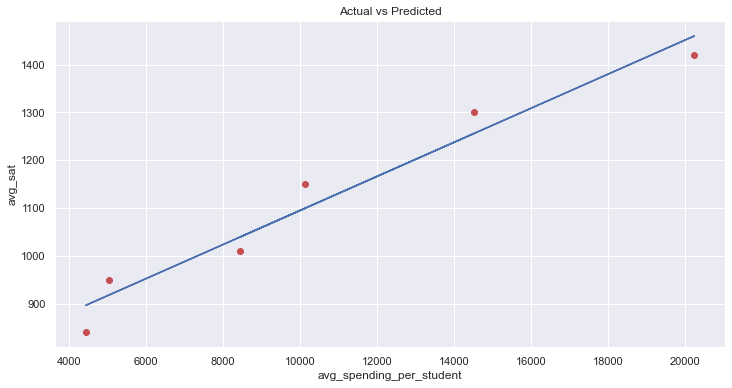

R2 is -0.9931716693336528


In [7]:
# Compute the regression parameters  𝑎∗  and  𝑏∗  and provide an interpretation for these parameters
[a_star, b_star] = regression_parameters(df[col1], df[col2])
print([a_star, b_star])

# Plot the data with the predicted line superimposed on top and comment on the residuals
y_hat = predict(a_star, b_star, df[col1])

plt.figure(figsize=(12, 6))
plt.plot(df[col1], y_hat)
plt.plot(df[col1], df[col2], 'ro')
plt.title('Actual vs Predicted')
plt.xlabel('avg_spending_per_student')
plt.ylabel('avg_sat')

plt.show()

# Evaluate  𝑅2  for the prediction and comment
R2 = r2(df[col2], y_hat)
R2

* Correct code, missing interpretation and comments
# 1.5/3

#### (d.1) Compare solution to scikit-learn

Implementing regression by hand is a useful exercise for understanding exactly what's happening under the hood when you use other methods for running regressions (and we will be implementing lots of algorithms by hand in this class). However, in practice, you will almost always be using a function provided by a Python library to build your machine learning models. 

The library [scikit-learn](https://scikit-learn.org/stable/) is the standard Python machine learning library and has implementations for most machine learning methods. The following code will carry out simple linear regression using scikit-learn on the spending/SAT data; please read the comments carefully to try to understand what is going on, as you will likely want to use scikit-learn for your project.

In [22]:
from sklearn.linear_model import LinearRegression # need to import the LinearRegression library

lm = LinearRegression() # initialize the model object
x = df[['avg_spending_per_student']] # extract the independent variable (note the strange double brackets here - 
                                     # this is because scikit leran is expecting something 2D as its first argument, since typically, you use more than 1 predictor in linear regression. 
                                     # If you don't do this, you'll get an error asking you to reshape your data.)
y = df.avg_sat # extract the dependent variable
lm.fit(x, y) # fit the model (note that this is happening in place - you don't assign the output to anything, the `lm` object has now learned the parameters from x and y)
print("slope=", lm.coef_[0])
print("intercept=", lm.intercept_)

slope= 0.035657635523487684
intercept= 738.2480215861958


Are these estimates the same as the estimates you computed by hand? (they should be - no need to do anything for this problem, just a useful thing to go through).

### My answer:
Yes, the estimates are the same as the ones I computed by hand. Slope is 0.0356, intercept is 738.24. 

#### (e) Extrapolate

In order to hang the hang of linear regression, we have been using clean examples and have only made predictions on the datasets themselves. Oftentimes, we build a model because we are interested in making predictions on *new* data.

Using the parameters found in the previous section, predict the average SAT score for students in districts with the following average spending (try to think of a way to build an array that will make this predicting straightforward):

- \$0
- \$1,000
- \$10,000
- \$20,000
- \$100,000

In [28]:
avg_spending = np.array([0, 1000, 10000, 20000, 100000])
pred_sat = predict(lm.coef_[0], lm.intercept_, avg_spending)

df_pred = pd.DataFrame({'avg_spending_per_student' : avg_spending, 'pred_sat' : pred_sat},
                       index = [f"District {i+1}" for i in range(avg_spending.shape[0])])
print(df_pred.head())

#plt.scatter(avg_spending, pred_sat)

            avg_spending_per_student     pred_sat
District 1                         0   738.248022
District 2                      1000   773.905657
District 3                     10000  1094.824377
District 4                     20000  1451.400732
District 5                    100000  4304.011574



Which of these predicted SAT scores are reasonable? Which are not? Why?

### My Answer:
SAT scores predicted at 0, 1,000, 10,000, 20,000 are reasonable because they're within the 1600 range. The last score is way beyond the max SAT score at 1600. Therefore, the predicted SAT score at 100,000 average spending per student is not reasonable.

# 2/2

### Exercise 1.23 - Anscombe's quartet

The file `anscombe.csv` contains four different small datasets - each dataset is indicated by the column `data` (that is, all (x,y) values associate with the same value for `data` belong to the same dataset).

Run the cell below to load the data:

In [9]:
anscombe = pd.read_csv('anscombe.csv')
anscombe.head()

,x,y,data
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


#### (a) Compute regression parameters for each dataset

First, we want to take each dataset in this one dataframe and run a simple linear regression where the independent variable is $x$ and the dependent variable is $y$. Keep track of parameters estimated for each dataset, along with the $R^2$ value of the predicton. What do you notice?

**Hint 1:** a `for` loop might be helpful here

**Hint 2:** recall that you can filter a dataframe to extract only the rows that you want!

In [10]:
# code
column_names = ['slope', 'intercept']
df_data = pd.DataFrame(columns = column_names)

for i in range(4):
    data = anscombe[anscombe['data']==i]

    [a_star, b_star] = regression_parameters(data['x'], data['y'])
    y_hat = predict(a_star, b_star, data['x'])
    R2 = r2(data['y'], y_hat)
    print(R2)

    df_data.loc[len(df_data.index)] = [b_star, a_star]

print(df_data)

0       0.994766
1       0.991491
2    -589.099030
3       0.000000
4       0.957416
5       0.999717
6     -21.564155
7       0.947801
8       0.696736
9       0.606966
10      0.990287
dtype: float64
11    0.517041
12   -2.176812
13    0.622898
14    0.000000
15    0.813787
16   -9.067862
17    0.991133
18    0.813432
19    0.993721
20   -8.928444
21    0.924044
dtype: float64
22   -181.065956
23      0.900496
24      0.617422
25      0.000000
26     -3.946385
27      0.252373
28      0.996891
29      0.966075
30     -0.706769
31      0.994438
32      0.983274
dtype: float64
33     0.791008
34     0.491851
35   -10.497996
36    -0.886007
37    -1.297812
38     0.992840
39     0.394859
40     1.000000
41     0.448789
42    -3.937284
43     0.966986
dtype: float64
      slope  intercept
0  3.000091   0.500091
1  3.000909   0.500000
2  3.002455   0.499727
3  3.001727   0.499909


# 5/5

#### (b) Plot the datasets

Now, plot each of the 4 datasets (if you are using a `for` loop, you can get plots to show up at each iteration by calling `plt.show()` after you've generated the plot). What do you notice? How does this make you feel about the results from part (a)?


[Double click this cell and replace this text with your answer]

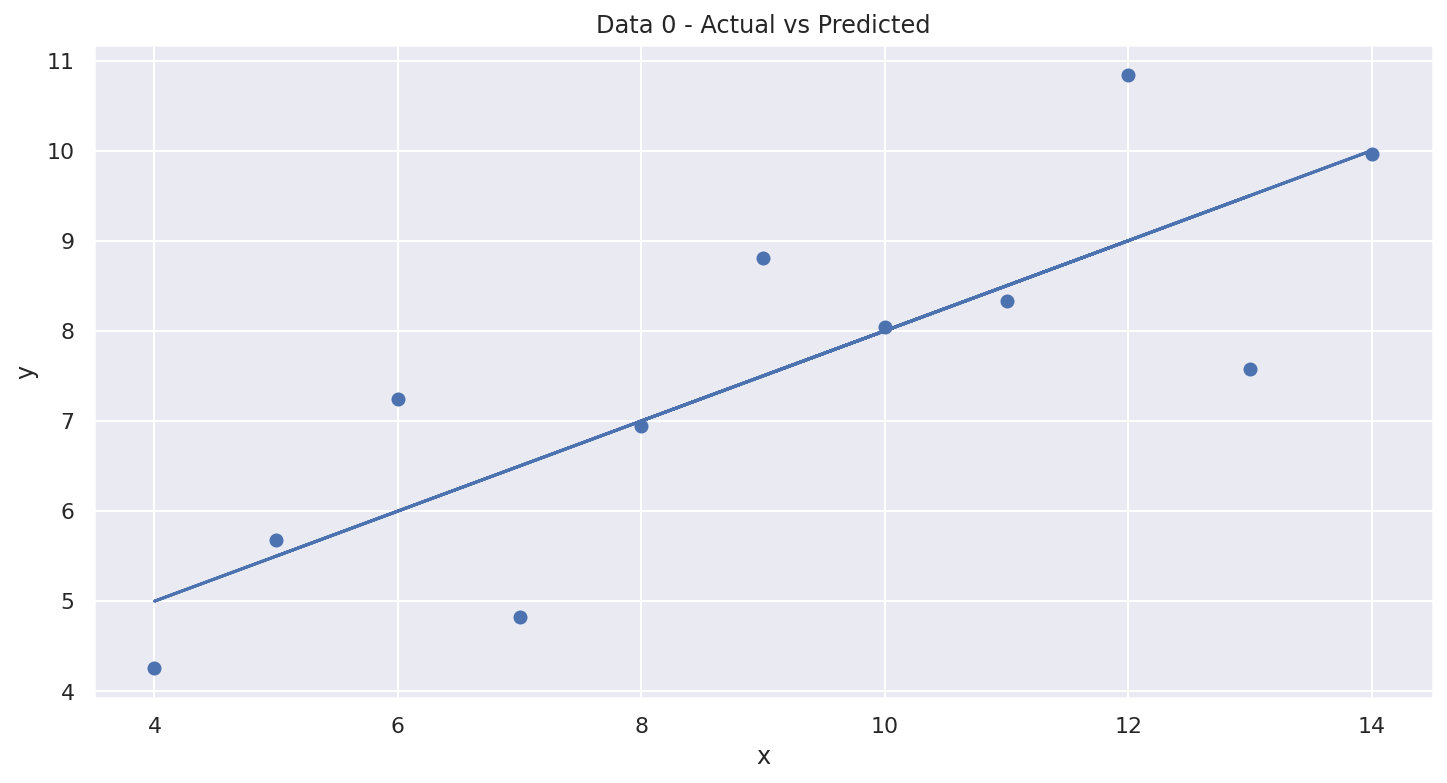

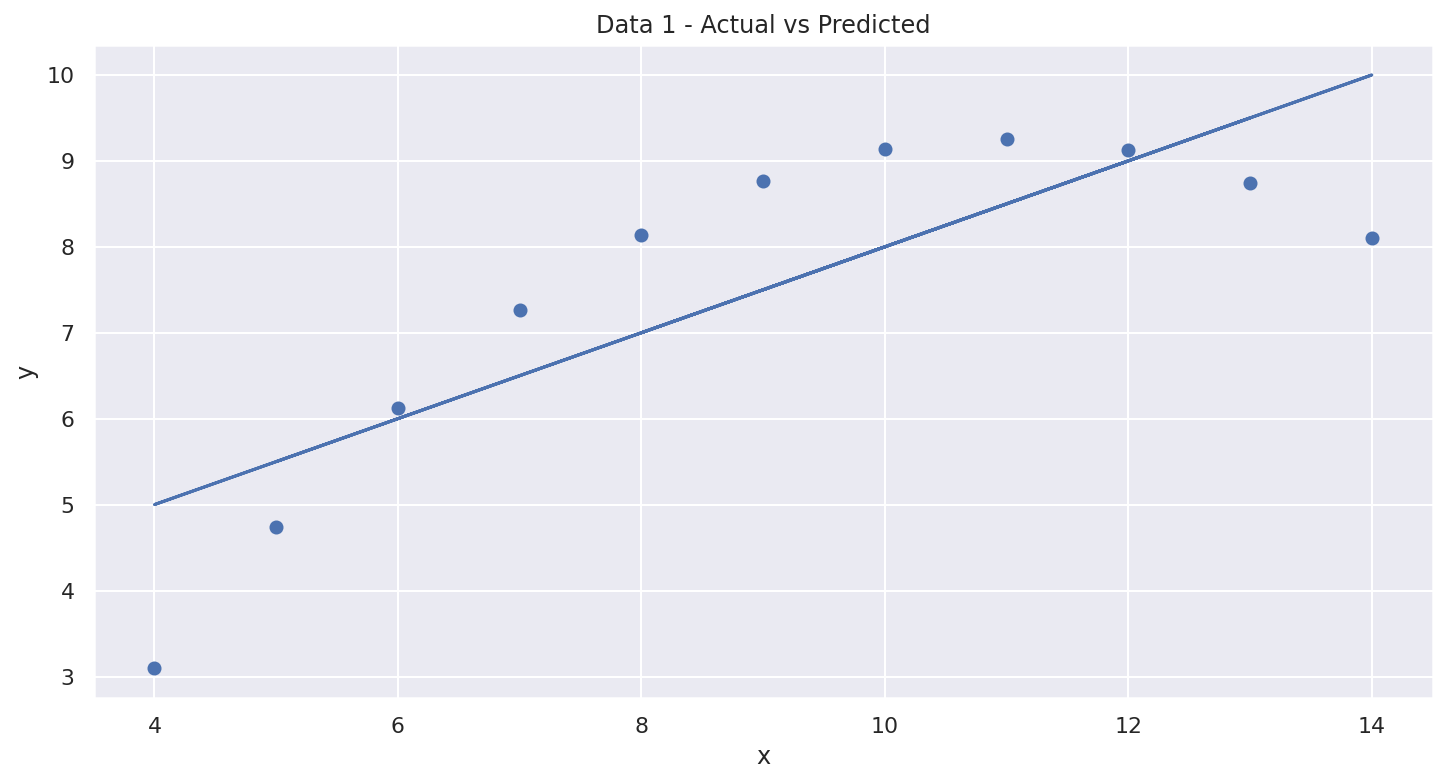

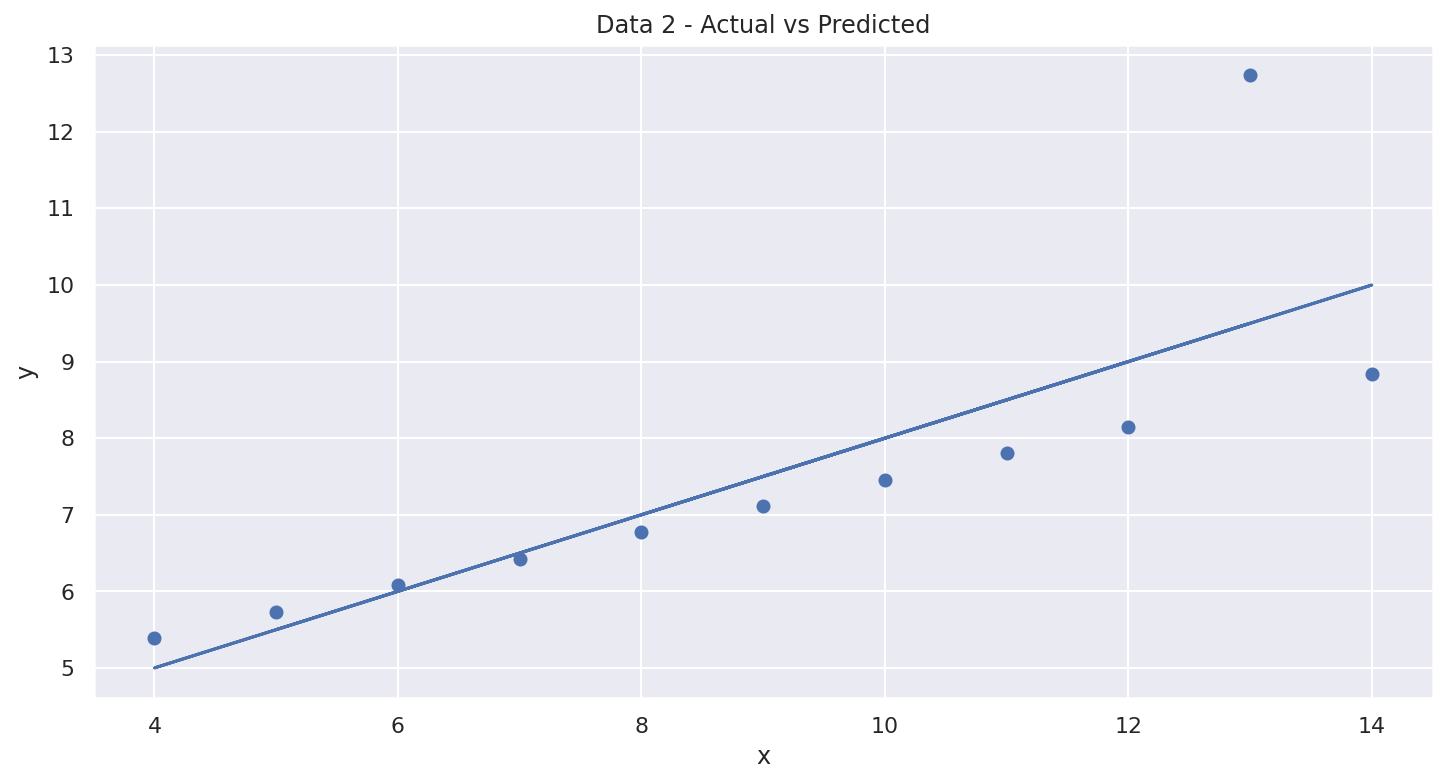

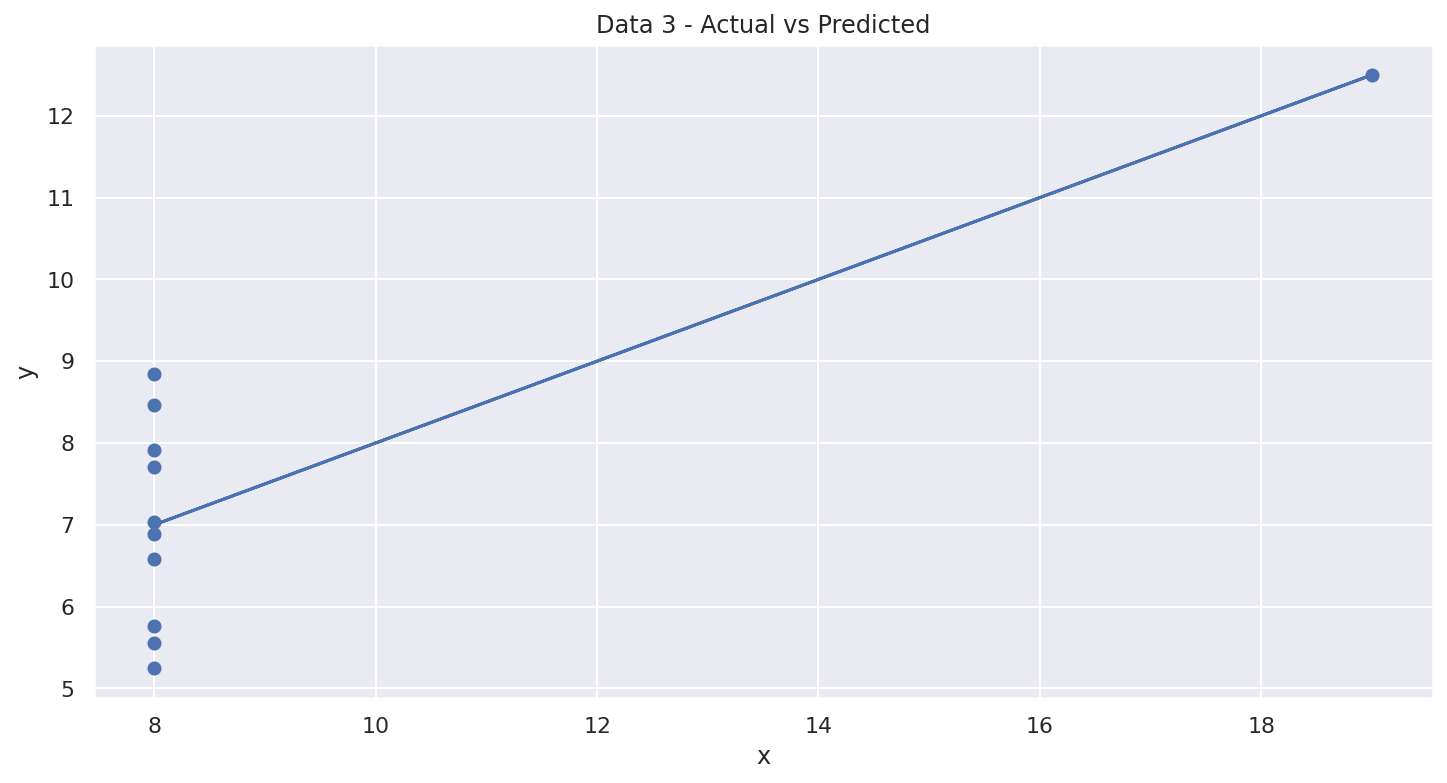

In [11]:
for i in range(4):
    data = anscombe[anscombe['data']==i]

    [a_star, b_star] = regression_parameters(data['x'], data['y'])
    y_hat = predict(a_star, b_star, data['x'])

    plt.figure(figsize=(12, 6))
    plt.plot(data['x'], y_hat)
    plt.scatter(data['x'], data['y'])
    plt.title(f'Data {i} - Actual vs Predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 5/5

#### (C) Pick a model
Which, if any, of the datasets does the model fit best? Why?

### My Answer:
Data 0 is the model that fit best since it follows the two assumptions while graphing linear regression. The two important assumptions when doing regression is the relationship between the response and explanatory variables should be linear, and residuals should not be correlated with explanatory variables.

The residuals in data 1 clearly shows a quadratic relationship, violating assumption #2.

The outlier in data 2 does not show a linear relationship with the remaining data points.

The clustered point in data 3 does not show a linear relationship. And the line is only formed by two points.

# 5/5

# Total: 30.5/31